In [9]:
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt
from QuditsOnQubits import create_ame43, create_graph_ghz, create_ghz
from qiskit_aer.primitives import Estimator as AerEstimator

In [2]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('CZ.qpy', 'rb') as fd:
    CZgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

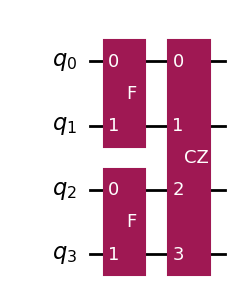

In [3]:
qc = QuantumCircuit(4)
qc.append(Fgate, [0, 1])
qc.append(Fgate, [2, 3])
qc.append(CZgate, [0, 1, 2, 3])
qc.draw('mpl')

In [4]:
stateqc = Statevector(qc)
stateqc.draw('latex')

<IPython.core.display.Latex object>

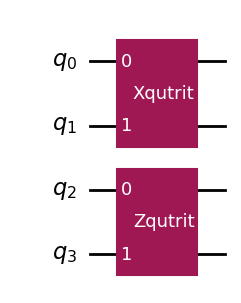

In [5]:
stabqc = QuantumCircuit(4)
stabqc.append(Xgate, [0, 1])
stabqc.append(Zgate, [2, 3])
stabqc.draw('mpl')

In [6]:
est = AerEstimator()
est.options.default_shots = 10_000

In [10]:
op_sp = SparsePauliOp.from_operator(Operator(stabqc))

In [15]:
job = est.run(qc, op_sp)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(0.994+0.017j)

GHZ

In [16]:
ghz_qc = create_ghz()
ghz_qc = ghz_qc[0]

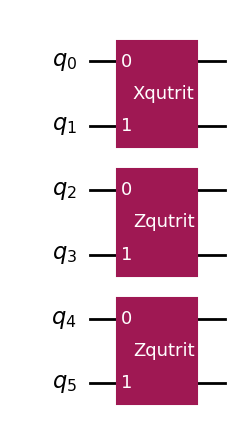

In [23]:
stab_ghz1 = QuantumCircuit(6)
stab_ghz1.append(Xgate, [0, 1])
stab_ghz1.append(Zgate, [2, 3])
stab_ghz1.append(Zgate, [4, 5])

op_stabghz1 = SparsePauliOp.from_operator(Operator(stab_ghz1))

stab_ghz1.draw('mpl')

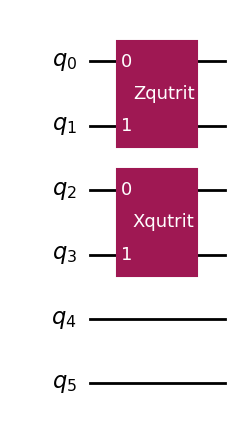

In [22]:
stab_ghz2 = QuantumCircuit(6)
stab_ghz2.append(Zgate, [0, 1])
stab_ghz2.append(Xgate, [2, 3])

op_stabghz2 = SparsePauliOp.from_operator(Operator(stab_ghz2))

stab_ghz2.draw('mpl')

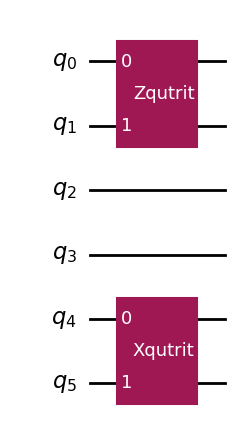

In [24]:
stab_ghz3 = QuantumCircuit(6)
stab_ghz3.append(Zgate, [0, 1])
stab_ghz3.append(Xgate, [4, 5])

op_stabghz3 = SparsePauliOp.from_operator(Operator(stab_ghz3))

stab_ghz3.draw('mpl')

In [25]:
job = est.run(ghz_qc, op_stabghz1)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(1.01+0.015j)

In [26]:
job = est.run(ghz_qc, op_stabghz2)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(1.006-0.006j)

In [27]:
job = est.run(ghz_qc, op_stabghz3)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(0.987-0.008j)

AME43

In [29]:
import igraph as ig

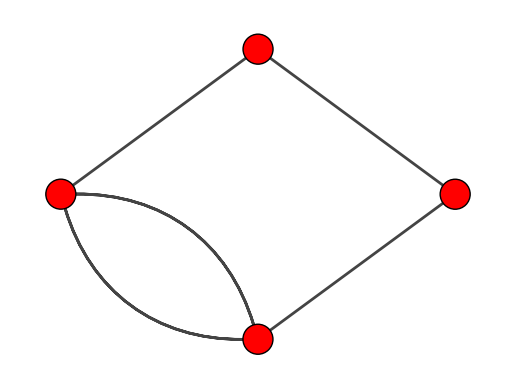

In [30]:
sq = ig.Graph()
sq.add_vertices(4)
sq.add_edges([(0, 1), (1, 2), (2, 3), (2, 3), (3, 0)])

fig, ax = plt.subplots()
ig.plot(sq, target=ax)

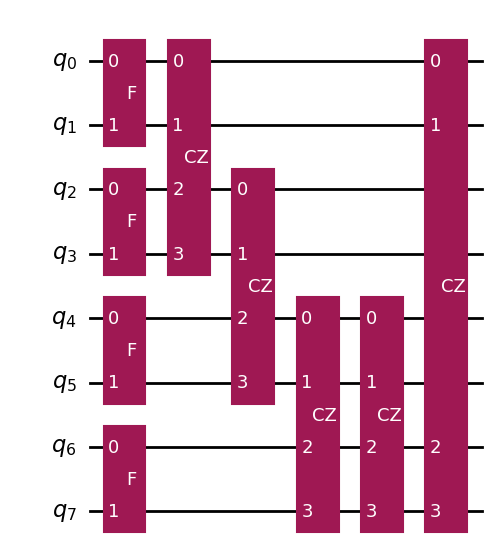

In [31]:
ame43_qc = create_graph_ghz(sq)
ame43_qc.draw('mpl')

In [32]:
ame43_state = Statevector(ame43_qc)
ame43_state.draw('latex')

<IPython.core.display.Latex object>

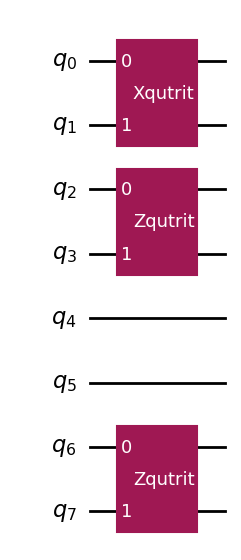

In [39]:
stab_ame43_1 = QuantumCircuit(8)
stab_ame43_1.append(Xgate, [0, 1])
stab_ame43_1.append(Zgate, [2, 3])
stab_ame43_1.append(Zgate, [6, 7])

op_ame43_1 = SparsePauliOp.from_operator(Operator(stab_ame43_1))

stab_ame43_1.draw('mpl')

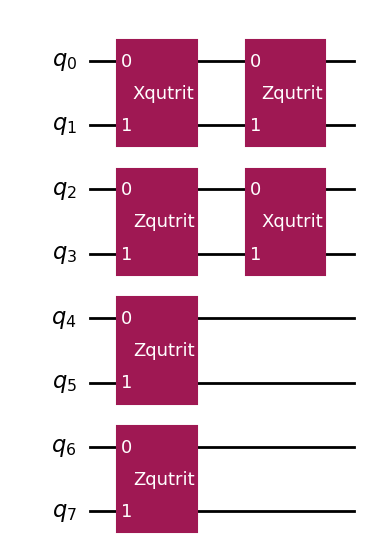

In [38]:
stab_ame43_2 = QuantumCircuit(8)
stab_ame43_2.append(Xgate, [0, 1])
stab_ame43_2.append(Zgate, [0, 1])
stab_ame43_2.append(Zgate, [2, 3])
stab_ame43_2.append(Xgate, [2, 3])
stab_ame43_2.append(Zgate, [4, 5])
stab_ame43_2.append(Zgate, [6, 7])

op_ame43_2 = SparsePauliOp.from_operator(Operator(stab_ame43_2))

stab_ame43_2.draw('mpl')

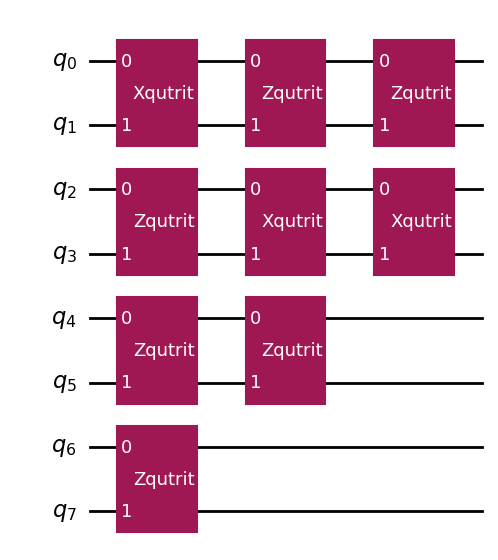

In [40]:
stab_ame43_3 = QuantumCircuit(8)
stab_ame43_3.append(Xgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [6, 7])

op_ame43_3 = SparsePauliOp.from_operator(Operator(stab_ame43_3))

stab_ame43_3.draw('mpl')

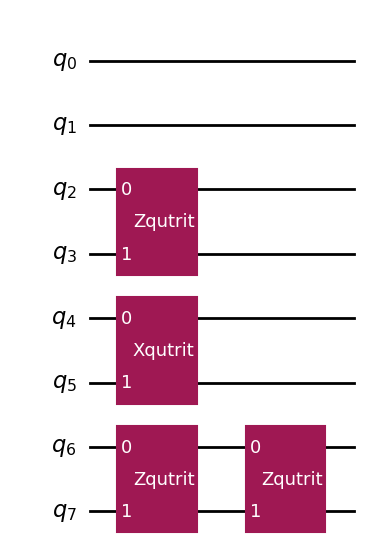

In [41]:
stab_ame43_4 = QuantumCircuit(8)
stab_ame43_4.append(Zgate, [2, 3])
stab_ame43_4.append(Xgate, [4, 5])
stab_ame43_4.append(Zgate, [6, 7])
stab_ame43_4.append(Zgate, [6, 7])

op_ame43_4 = SparsePauliOp.from_operator(Operator(stab_ame43_4))

stab_ame43_4.draw('mpl')

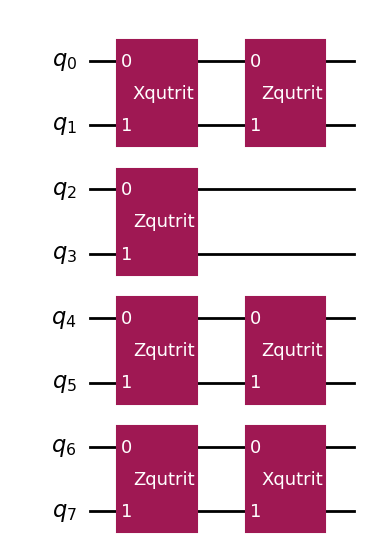

In [42]:
stab_ame43_5 = QuantumCircuit(8)
stab_ame43_5.append(Xgate, [0, 1])
stab_ame43_5.append(Zgate, [0, 1])
stab_ame43_5.append(Zgate, [2, 3])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [6, 7])
stab_ame43_5.append(Xgate, [6, 7])

op_ame43_5 = SparsePauliOp.from_operator(Operator(stab_ame43_5))

stab_ame43_5.draw('mpl')

In [66]:
job = est.run(ame43_qc, op_ame43_1)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(1.009+0.016j)

In [44]:
job = est.run(ame43_qc, op_ame43_2)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(1.013+0.007j)

In [45]:
job = est.run(ame43_qc, op_ame43_3)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(0.993-0.022j)

In [46]:
job = est.run(ame43_qc, op_ame43_4)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(1.007+0.018j)

In [47]:
job = est.run(ame43_qc, op_ame43_5)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(1.035-0.016j)

In [50]:
stab_ame43_1_dag = QuantumCircuit(8)
stab_ame43_1_dag.append(Xgate, [0, 1])
stab_ame43_1_dag.append(Zgate, [2, 3])
stab_ame43_1_dag.append(Zgate, [6, 7])

op_ame43_1_dag = SparsePauliOp.from_operator(Operator(stab_ame43_1_dag).transpose().conjugate())


In [51]:
job = est.run(ame43_qc, op_ame43_1_dag)
exp_val = job.result().values[0]
exp_val.round(3)

np.complex128(0.975-0.028j)

In [53]:
A = (0.5 * (op_ame43_1 + op_ame43_1.adjoint()))
B = (-0.5j * (op_ame43_1 - op_ame43_1.adjoint()))

In [54]:
A.equiv(A.conjugate().transpose())

True

In [55]:
B.equiv(B.conjugate().transpose())

True

In [62]:
job = est.run(ame43_qc, A)

exp_val_A = job.result().values[0]
#exp_val.round(3)

In [63]:
exp_val_A

np.float64(1.005265787167295)

In [64]:
job = est.run(ame43_qc, B)

exp_val_B = job.result().values[0]

In [65]:
exp_val_B

np.float64(-0.010604307808944904)

In [67]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [68]:
service = QiskitRuntimeService(channel="ibm_quantum", token="69c33c504eae6077ab5a35bc23ed37d0e2ce46a8d88b9c3f72fd32883335a986ef5c86d80f8b561cbdbe773a8d56475d710fd741d28597d1148e2dcf74fe488d")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_strasbourg'

In [69]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [70]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ame43_isa_circuit = pm.run(ame43_qc)

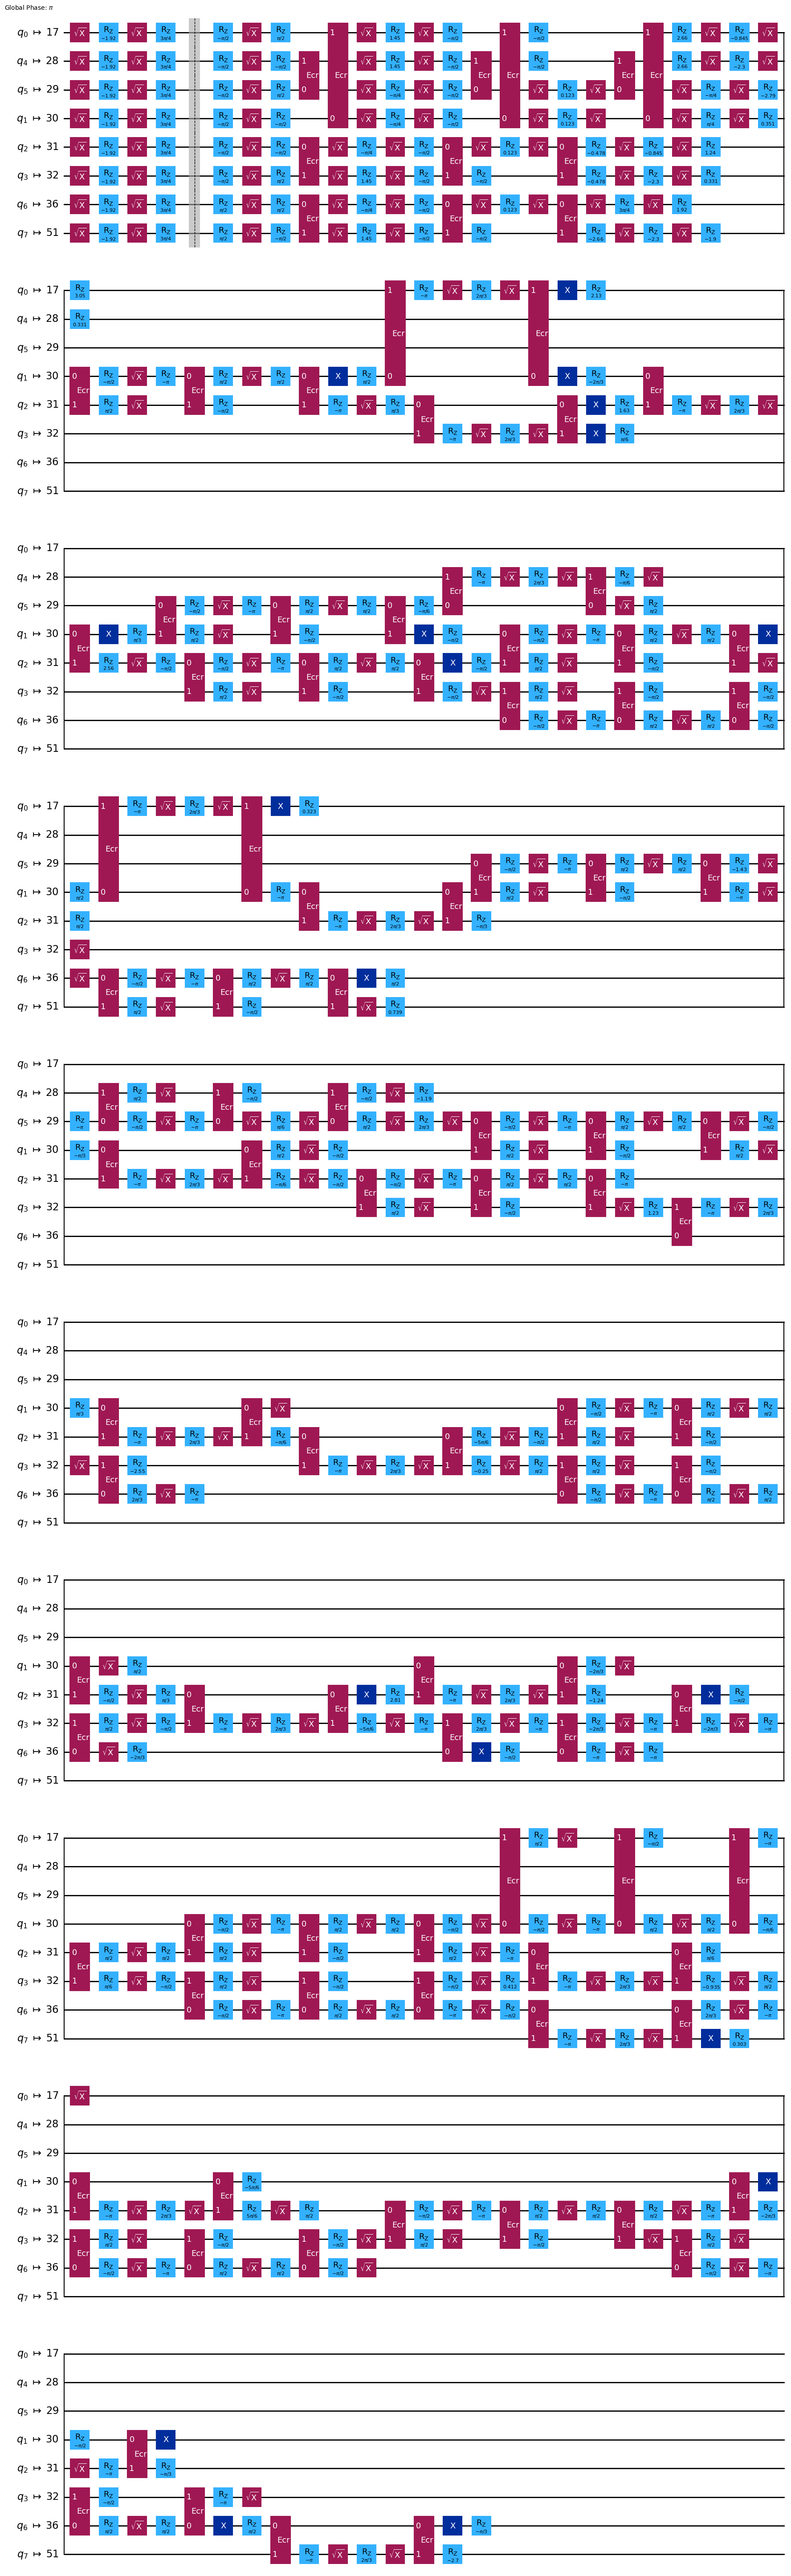

In [72]:
ame43_isa_circuit.draw('mpl', idle_wires=False)

In [73]:
ame43_isa_circuit.depth()

237